#                      1. Use the Advertising data (Advertising)

## Import the module

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import numpy as np
from prettytable import PrettyTable
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PowerTransformer
from sklearn.linear_model import ElasticNetCV
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

## Read the file "Advertising.xlsx" file using the pandas library

In [2]:
df=pd.read_excel("Advertising.xlsx", engine='openpyxl')

#### Get a quick look of the data

In [3]:
df.head()

,Unnamed: 0,TV,radio,newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


#### drop the column "Unnamed: 0"

In [4]:
df=df.drop(["Unnamed: 0"],axis=1)
df.head()

,TV,radio,newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


# Exploratory Data Analysis

### Descriptive Statistical Analysis:first take a look at the variables by utilizing a description method.

In [5]:
df.describe()

,TV,radio,newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### view the relationship between pairwise variables using the pairplot

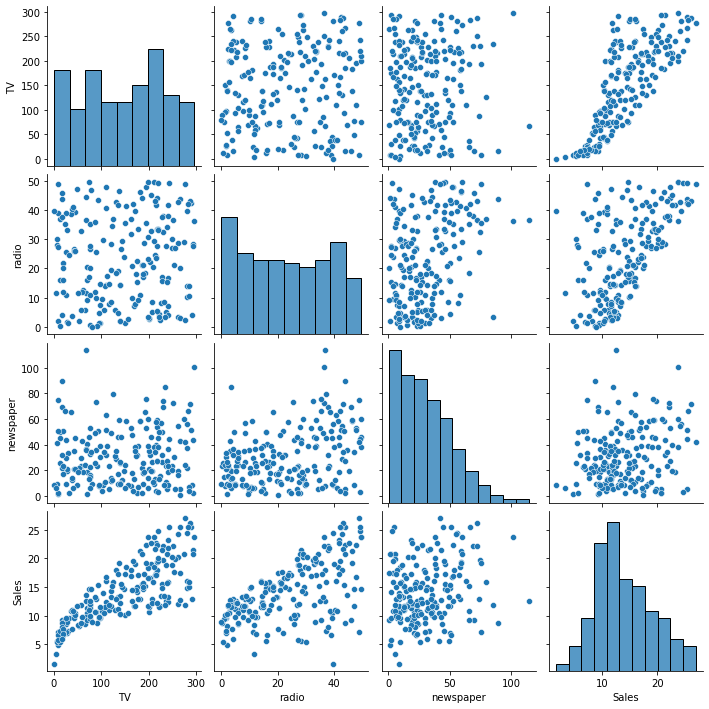

In [6]:
sns.pairplot(df)
plt.show()

# Model Development : Linear Regression

### seperate the data into features and target variables

In [7]:
df_x=df.drop(["Sales"],axis=1)
df_y=df["Sales"]

In [8]:
# Add a constant to the features, which is required for statsmodels
df_X = sm.add_constant(df_x)

# Create a linear regression model using statsmodels
model = sm.OLS(df_y, df_X)

# Fit the model to the data
results = model.fit()

# i,ii.Determine Is it a good model or not and figure out what does the coefficient and t-test’s p-value tell us.

In [9]:
# Print a summary of the model, including p-values,R-squared,Adj. R-squared
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 25 Mar 2023   Prob (F-statistic):           1.58e-96
Time:                        21:36:36   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

In [10]:
# Get the R-squared from the results object
r_squared = results.rsquared
print("R-squared:", r_squared)

# Get the adjusted R-squared from the results object
adj_r_squared = results.rsquared_adj
print("Adjusted R-squared:", adj_r_squared)

# Get the Mean Squared Error (MSE) from the results object
mse = results.mse_resid
print("Mean Squared Error (MSE):", mse)

R-squared: 0.8972106381789522
Adjusted R-squared: 0.8956373316204668
Mean Squared Error (MSE): 2.8409452188887103


### Conclusion:by seeing R-squared,Adj. R-squared and ,The model is not bad, but there is still some room for improvement

In [11]:
coefficients = results.params
print("coefficients:", coefficients)
print("----------------------------------------")
# Get the p-values for each coefficient
p_values = results.pvalues
print("P-values:", p_values)

coefficients: const        2.938889
TV           0.045765
radio        0.188530
newspaper   -0.001037
dtype: float64
----------------------------------------
P-values: const        1.267295e-17
TV           1.509960e-81
radio        1.505339e-54
newspaper    8.599151e-01
dtype: float64


### Conclusion:The coefficient values indicate the effect of each feature on the target variable (Sales). A positive coefficient means that the Sales increase with an increase in the feature value, while a negative coefficient indicates that the Sales decrease with an increase in the feature value. The t-test's p-value helps us determine if the feature is statistically significant in predicting the target variable. A small p-value (typically less than 0.05) indicates that the feature is significant.

# iii.Rebuild the model without newspaper as a feature.

In [12]:
dfx=df_x.drop(["newspaper"],axis=1)

In [13]:
# Add a constant to the features, which is required for statsmodels
df_X1 = sm.add_constant(dfx)

# Create a linear regression model using statsmodels
model1 = sm.OLS(df_y, df_X1)

# Fit the model to the data
results1 = model1.fit()
# Print a summary of the model, including p-values,R-squared,Adj. R-squared
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sat, 25 Mar 2023   Prob (F-statistic):           4.83e-98
Time:                        21:36:37   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9211      0.294      9.919      0.0

In [14]:
# Get the R-squared from the results object
r_squared1 = results1.rsquared
print("R-squared:", r_squared1)

# Get the adjusted R-squared from the results object
adj_r_squared1 = results1.rsquared_adj
print("Adjusted R-squared:", adj_r_squared1)

# Get the Mean Squared Error (MSE) from the results object
mse1 = results1.mse_resid
print("Mean Squared Error (MSE):", mse1)

R-squared: 0.8971942610828956
Adjusted R-squared: 0.8961505479974428
Mean Squared Error (MSE): 2.8269745181097377


## Conclusion:The performance of the second model is almost as same as the first model, but compare with the first model, the R square and Mean Squared Error of the second model are smaller and the Adjusted R-squared is greater than the first model,so the model is way better now.

# iv.Add TV*Radio as a new feature, rebuild the model and compare with the previous models. 

In [15]:
df_x2=df_x
df_x2["TV_radio"]=df_x["TV"] * df_x["radio"]


In [16]:
# Add a constant to the features, which is required for statsmodels
df_X2 = sm.add_constant(df_x2)

# Create a linear regression model using statsmodels
model2 = sm.OLS(df_y, df_X2)

# Fit the model to the data
results2 = model2.fit()
# Print a summary of the model, including p-values,R-squared,Adj. R-squared
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1466.
Date:                Sat, 25 Mar 2023   Prob (F-statistic):          2.92e-144
Time:                        21:36:37   Log-Likelihood:                -270.04
No. Observations:                 200   AIC:                             550.1
Df Residuals:                     195   BIC:                             566.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7284      0.253     26.561      0.0

In [17]:
# Get the R-squared from the results object
r_squared2 = results2.rsquared
print("R-squared:", r_squared2)

# Get the adjusted R-squared from the results object
adj_r_squared2 = results2.rsquared_adj
print("Adjusted R-squared:", adj_r_squared2)

# Get the Mean Squared Error (MSE) from the results object
mse2 = results2.mse_resid
print("Mean Squared Error (MSE):", mse2)

R-squared: 0.9678222434748514
Adjusted R-squared: 0.9671621869307457
Mean Squared Error (MSE): 0.8939061207077617


## Conclusion:We found that the performance of the thrid model is better than the previous models by comparing their R-squared,Adjusted R-squared and MSE.

# 2.The fish dataset (Fish-3Only-Homework) contains the weight, height, and width data of 3 different kinds of fish: Bream, Roach, and Perch. Use Excel or software of youir choice to do the following:

## a.Explore the dataset and watch for possible missing data.

In [18]:
df1=pd.read_excel("Fish Weight-3Only.xlsx", engine='openpyxl')

In [19]:
missing_data = df1.isnull()
for column in missing_data.columns:
    print(column)
    print(missing_data[column].value_counts())
    print("")

Species
False    111
Name: Species, dtype: int64

Weight
False    111
Name: Weight, dtype: int64

Length1
False    111
Name: Length1, dtype: int64

Length2
False    111
Name: Length2, dtype: int64

Length3
False    111
Name: Length3, dtype: int64

Height
False    111
Name: Height, dtype: int64

Width
False    111
Name: Width, dtype: int64



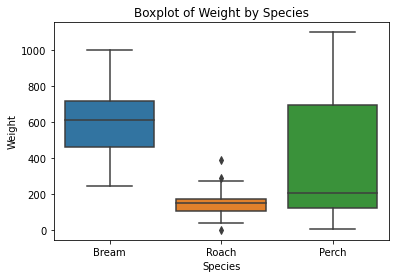

In [20]:
#use boxplot to illustrate the relationship of 3 species
sns.boxplot(x='Species', y='Weight', data=df1)
plt.title('Boxplot of Weight by Species')
plt.show()

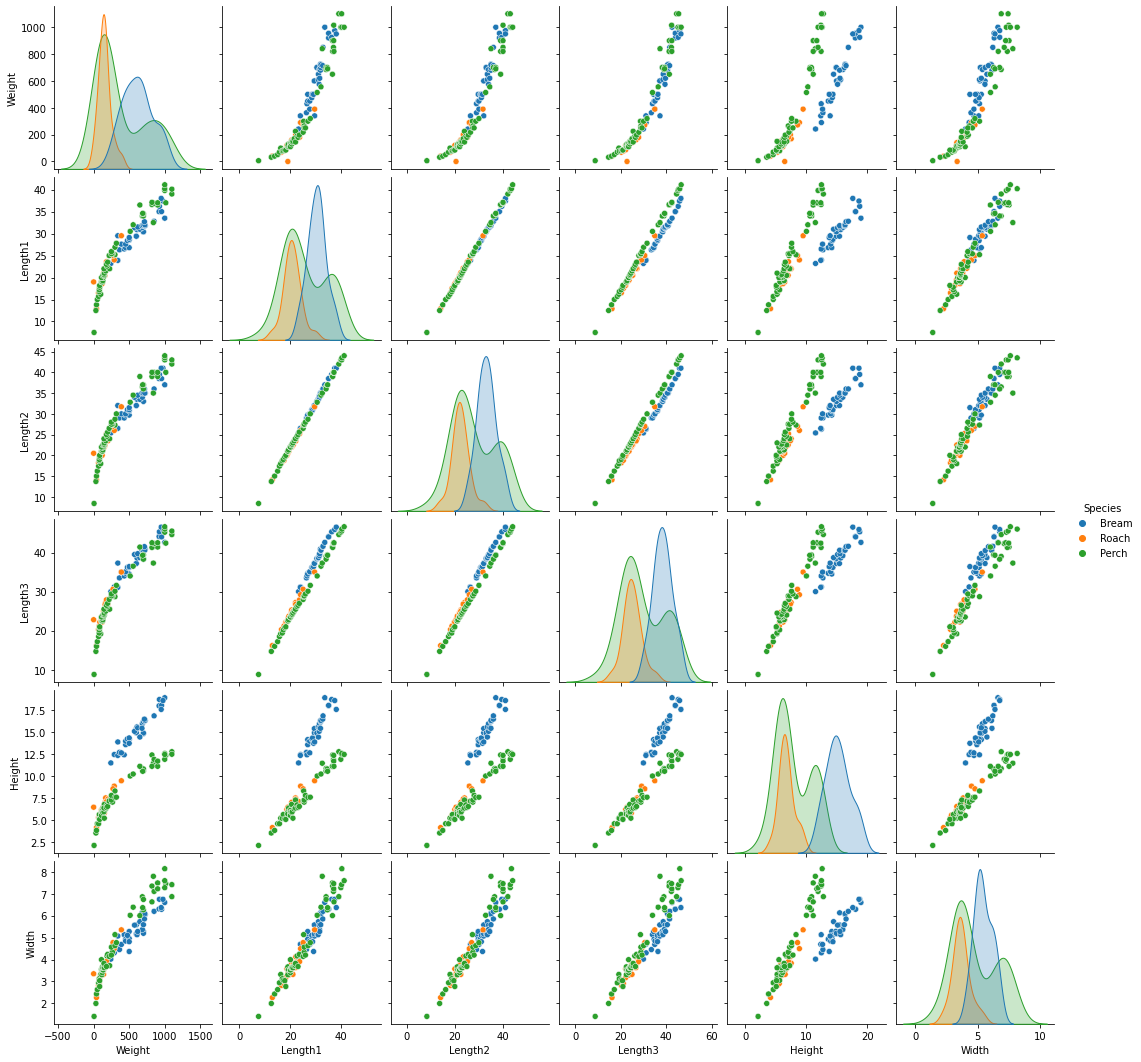

In [21]:
#using pairplot to explore the patterns of 3 species
sns.pairplot(df1, hue='Species')
plt.show()

## Conclusion: the dataset doesn't contains any missing data

## b.Since fish species is a categorical variable please do one-hot encoding (name your dummy variables Bream-D, Roach-D, and Perch-D if your software allows). Note: if you use Excel you can use only 2. The third one would then be represented by (0,0).  

In [22]:
# One-hot encoding for the fish species
df1_encoded = pd.get_dummies(df1, columns=['Species'], prefix='', prefix_sep='', drop_first=False)
df1_encoded.rename(columns={'Bream': 'Bream-D', 'Roach': 'Roach-D', 'Perch': 'Perch-D'}, inplace=True)
df1_encoded.head()

,Weight,Length1,Length2,Length3,Height,Width,Bream-D,Perch-D,Roach-D
0,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0


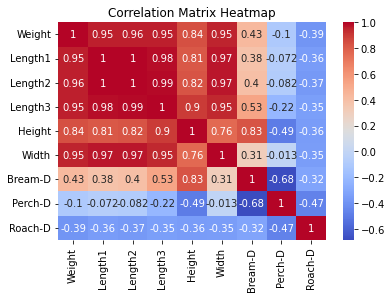

In [23]:
corr_matrix = df1_encoded.corr()

# Create the heatmap to explore the relationship after encoding
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

## c.Split the data into Train (80%) and test (20%) for each kind of fish. How do you make the split? Would it be appropriate to just take the last 20% of the data as the test set?

In [24]:
X = df1_encoded.drop('Weight', axis=1)
y = df1_encoded['Weight']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=df1['Species'], random_state=0)

### I used stratify=data['Species'] in the train_test_split function to ensure that the proportion of each fish species in the train and test sets is the same as the proportion in the original dataset. This is particularly useful when you have imbalanced classes or a small dataset.

### Taking the last 20% of the data as the test set might not be appropriate in many cases, especially when the data has some sort of order or temporal relation. 

## d.Build a linear regression model of fish’s Weight with height, width and the one-hot variables as features. Write the formula of your model.

In [25]:
lg1=LinearRegression()
lg1.fit(x_train, y_train)

LinearRegression()

In [26]:
lg1.coef_

array([  -5.03982178,   20.53147541,  -11.23290181,   72.60090012,
         52.72479904, -195.15526313,  122.69124521,   72.46401793])

In [27]:
lg1.intercept_

-673.3583022689656

## Formula : Weight = lg1.intercept_ + (Length1* lg1.coef_[0]) + (Length2* lg1.coef_[1]) + (Length3 * lg1.coef_[2]) + (Height * lg1.coef_[3]) + (Width * lg1.coef_[4])+(Bream-D * lg1.coef_[5])+(Perch-D * lg1.coef_[6])+(Roach-D* lg1.coef_[7])

## e.Report the R-sqaure and RMSE of the training set. Check other key regression performance criteria.

In [28]:
y_train_pred = lg1.predict(x_train)
r2_train = r2_score(y_train, y_train_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
mae_train = mean_absolute_error(y_train, y_train_pred)
print("R-squared (train):", r2_train)
print("RMSE (train):", rmse_train)
print("Mean Absolute Error(train):", mae_train)

R-squared (train): 0.9496679860323342
RMSE (train): 71.55708678917124
Mean Absolute Error(train): 53.20057525411089


## f. Calculate the R-squared and RMSE of the test set. Are they close to the training set?

In [29]:
# R-squared and RMSE of the test set
y_test_pred = lg1.predict(x_test)
r2_test = r2_score(y_test, y_test_pred)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
mae_test = mean_absolute_error(y_test, y_test_pred)
print("R-squared (test):", r2_test)
print("RMSE (test):", rmse_test)
print("Mean Absolute Error(test):", mae_test)

R-squared (test): 0.9422175931851506
RMSE (test): 71.11944336989121
Mean Absolute Error(test): 50.47399392158193


## Conclusion: they are almost same,the MAE, Rsquare and RMSE of testset are smaller.

# 3. Concrete is the most important material in civil engineering. The concrete compressive strength could be modeled as a highly nonlinear function of age and ingredients. The relationships could be nonlinear.

## a.Explore the dataset (concrete-Homework). Watch for missing data. Provide a sample of the plots you created.

In [30]:

# a. Explore the dataset
df2 = pd.read_excel('Concrete-Homework.xlsx')
print(df2.head())
print("____________________________________________________________________")
print(df2.info())

   Unnamed: 0  Cement  BlastFurnaceSlag  FlyAsh  Water  Superplasticizer  \
0           1   540.0               0.0     0.0  162.0               2.5   
1           2   540.0               0.0     0.0  162.0               2.5   
2           3   332.5             142.5     0.0  228.0               0.0   
3           4   332.5             142.5     0.0  228.0               0.0   
4           5   198.6             132.4     0.0  192.0               0.0   

   CoarseAggregate  FineAggregate    Age  CompressiveStrength  
0           1040.0          676.0   28.0                79.99  
1           1055.0          676.0   28.0                61.89  
2            932.0          594.0  270.0                40.27  
3            932.0          594.0  365.0                41.05  
4            978.4          825.5  360.0                44.30  
____________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (to

In [31]:
#drop the Unnamed column
df2=df2.drop(["Unnamed: 0"],axis=1)

### From the table above, we could see some missing values in columns : Cement, Water and Superplasticizer,because those missing values are float, so we can replace the missing values of Cement ,Water and Superplasticizer by mean.

In [32]:
Cement_mean= df2["Cement"].mean()
Water_mean=df2["Water"].mean()
Superplasticizer_mean=df2["Superplasticizer"].mean()
# Replace missing values with mean
df2['Cement'] = df2['Cement'].fillna(Cement_mean)
df2['Water'] = df2['Water'].fillna(Water_mean)
df2['Superplasticizer'] = df2['Superplasticizer'].fillna(Superplasticizer_mean)


In [33]:
# check the missing value again
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cement               1032 non-null   float64
 1   BlastFurnaceSlag     1032 non-null   float64
 2   FlyAsh               1032 non-null   float64
 3   Water                1032 non-null   float64
 4   Superplasticizer     1032 non-null   float64
 5   CoarseAggregate      1032 non-null   float64
 6   FineAggregate        1032 non-null   float64
 7   Age                  1032 non-null   float64
 8   CompressiveStrength  1032 non-null   float64
dtypes: float64(9)
memory usage: 72.7 KB


In [34]:
#check the duplicated rows
df2.duplicated().sum()

25

In [35]:
#view and drop the duplicated rows
df2[df2.duplicated()]

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
77,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3.0,33.40
80,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3.0,33.40
86,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3.0,35.30
88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3.0,35.30
91,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3.0,35.30
100,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7.0,49.20
103,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7.0,49.20
109,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7.0,55.90
111,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7.0,55.90
123,425.0,106.3,0.0,153.5,16.5,852.1,887.1,28.0,60.29


In [36]:
df2.drop_duplicates(inplace=True)

## c.Build the best Linear Regression model you can. 

### i.Report any feature engineering (feature choice, transformation etc) you did. 

In [37]:
df2.corr()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
Cement,1.000000,-0.303323,-0.385610,-0.056626,0.060907,-0.086206,-0.245375,0.086348,0.488284
BlastFurnaceSlag,-0.303323,1.000000,-0.312353,0.130261,0.019801,-0.277559,-0.289684,-0.042759,0.103375
FlyAsh,-0.385610,-0.312353,1.000000,-0.283312,0.414211,-0.026468,0.090261,-0.158940,-0.080649
Water,-0.056626,0.130261,-0.283312,1.000000,-0.646947,-0.212479,-0.444915,0.279283,-0.269625
Superplasticizer,0.060907,0.019801,0.414211,-0.646947,1.000000,-0.241721,0.207993,-0.194076,0.344210
CoarseAggregate,-0.086206,-0.277559,-0.026468,-0.212479,-0.241721,1.000000,-0.162187,-0.005263,-0.144719
FineAggregate,-0.245375,-0.289684,0.090261,-0.444915,0.207993,-0.162187,1.000000,-0.156573,-0.186447
Age,0.086348,-0.042759,-0.158940,0.279283,-0.194076,-0.005263,-0.156573,1.000000,0.337366
CompressiveStrength,0.488284,0.103375,-0.080649,-0.269625,0.344210,-0.144719,-0.186447,0.337366,1.000000


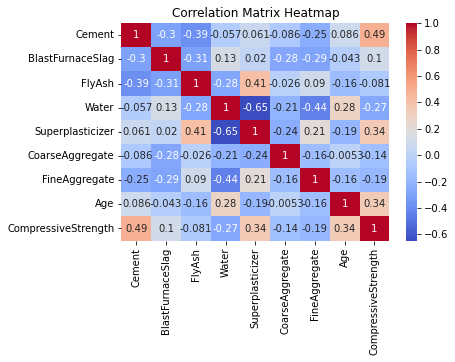

In [38]:
corr_matrix = df2.corr()

# Create the heatmap to explore the relationship 
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

### Observations:
### Except 'Cement', 'Water', 'Superplastic' and 'Age' features, all other features are having very weak relationship with concrete 'Strength' feature and does not account for making statistical decision (of correlation).

## EDA (Exploratory Data Analysis) Summary

### Except 'Cement', 'Water', 'Superplastic' and 'Age' features, all other features are having very weak relationship with concrete 'Strength' feature and does not account for making statistical decision (of correlation).

### Concrete Cement feature is having Low Negative Correlation with Slag and Ash features, perhaps we can create additional features like (cement + slag) and (cement + ash) to predict the concrete strength.

### Concrete Fineagg feature is having Low Negative Correlation with Water feature, perhaps we can create additional features like (water + fineagg) to predict the concrete strength.

In [39]:
# features selection
X = df2
X["cement + BlastFurnaceSlag"]=X["Cement"]+X["BlastFurnaceSlag"]
X["cement + flyAsh"]=X["Cement"]+X["FlyAsh"]
X["water + FineAggregate"]=X["Water"]+X["FineAggregate"]

# Calculate correlation coefficients with CompressiveStrength
corr_with_target = X.corr()['CompressiveStrength'].drop('CompressiveStrength')
# Select columns with correlation between -0.2 and 0.2 with target
cols_to_drop = corr_with_target[(corr_with_target < 0.2) & (corr_with_target > -0.2)].index
X = X.drop(columns=cols_to_drop)

X = X.drop('CompressiveStrength', axis=1)
y = df2['CompressiveStrength']


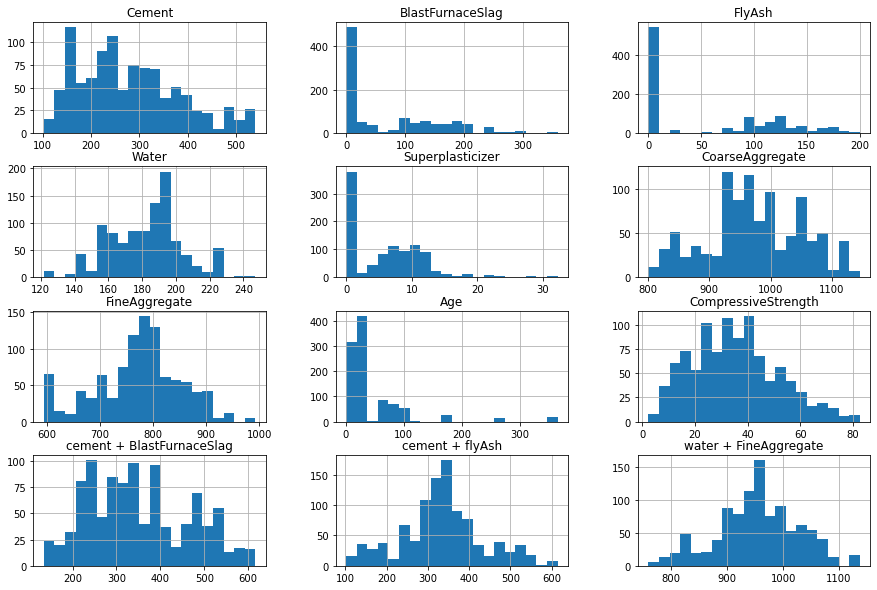

In [40]:
# view the distribution of the data
df2.hist(bins=20, figsize=(15,10))
plt.show()

# PowerTransformer is a type of data transformation that aims to make the data more normally distributed. As we see that our data is skewed or not normally distributed , so I choose to use PowerTransformer for Scaling the data.

## b.Split the dataset into 80% training and 20% test sets.

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## c.Build the best Linear Regression model you can. 

### ii.Report the RMSE of your Train and Test datasets.

# First model with selected and modified features

In [42]:
# Scale the features using PowerTransformer
scaler = PowerTransformer()
X_train1 = scaler.fit_transform(X_train)
X_test1 = scaler.transform(X_test)

In [43]:
# Linear Regression + ElasticNet+CV
model = ElasticNetCV(cv=5, random_state=42)
model.fit(X_train1, y_train)
print("ElasticNetCV Train RMSE:", np.sqrt(mean_squared_error(y_train, model.predict(X_train1))))
print("ElasticNetCV Train R square:", r2_score(y_train, model.predict(X_train1)))
print("ElasticNetCV Test RMSE:", np.sqrt(mean_squared_error(y_test, model.predict(X_test1))))
print("ElasticNetCV Test R square:", r2_score(y_test, model.predict(X_test1)))

ElasticNetCV Train RMSE: 6.987106980459357
ElasticNetCV Train R square: 0.8116206370787479
ElasticNetCV Test RMSE: 7.362575307701919
ElasticNetCV Test R square: 0.8096880137853566


# Second model with original four features:'Cement', 'Water', 'Superplasticizer' and 'Age'

In [44]:
X1=df2[['Cement', 'Water', 'Superplasticizer' , 'Age']]
X_train2, X_test2, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)
scaler1 = PowerTransformer()
X_train2 = scaler1.fit_transform(X_train2)
X_test2 = scaler1.transform(X_test2)

In [45]:
# Linear Regression + ElasticNet + CV
model2 = ElasticNetCV(cv=5, random_state=42)
model2.fit(X_train2, y_train)
print("ElasticNetCV Train RMSE:", np.sqrt(mean_squared_error(y_train, model2.predict(X_train2))))
print("ElasticNetCV Train R square:", r2_score(y_train, model2.predict(X_train2)))
print("ElasticNetCV Test RMSE:", np.sqrt(mean_squared_error(y_test, model2.predict(X_test2))))
print("ElasticNetCV Test R square:", r2_score(y_test, model2.predict(X_test2)))

ElasticNetCV Train RMSE: 8.871127548075503
ElasticNetCV Train R square: 0.6963339885382247
ElasticNetCV Test RMSE: 9.400626556485337
ElasticNetCV Test R square: 0.6897439614924534


# Conclusion : the first model is the best model we made, it better than the Second model with original four features

# d.Build the best Decision Tree model you can. Report the RMSE of your Train and Test datasets. Report the hyperparameters you use,

In [46]:
# Define parameter grid
param_grid = {'max_depth': [2, 4, 6, 8, 10],
              'min_samples_split': [2, 4, 6, 8, 10],
              'min_samples_leaf': [1, 2, 4, 6, 8, 10]}
dt=DecisionTreeRegressor(random_state=45)


In [47]:
grid_dt = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid_dt.fit(X, y)
# Print best hyperparameters
print("Best hyperparameters: ", grid_dt.best_params_)

# Train Decision Tree model with best hyperparameters
best_dt = grid_dt.best_estimator_

Best hyperparameters:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 6}


In [48]:
# Fit Decision Tree model on training data
best_dt.fit(X_train1, y_train)

# Evaluate Decision Tree model on training data
y_pred_train = best_dt.predict(X_train1)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rsquare_train=r2_score(y_train, y_pred_train)
print("Decision Tree Train R Square: ", rsquare_train)
print("Decision Tree Train RMSE: ", rmse_train)

print("--------------------------------------------------------")
# Evaluate Decision Tree model on testing data
y_pred_test = best_dt.predict(X_test1)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
rsquare_test=r2_score(y_test, y_pred_test)
print("Decision Tree Test R Square: ", rsquare_test)
print("Decision Tree Test RMSE: ", rmse_test)

Decision Tree Train R Square:  0.9704098231386313
Decision Tree Train RMSE:  2.7692012017373315
--------------------------------------------------------
Decision Tree Test R Square:  0.8533649288911598
Decision Tree Test RMSE:  6.462723954884105


## e.Build the best Random Forest model you can. Report the RMSE of your Train and Test datasets. Report the hyperparameters you use. 

In [49]:
# Define parameter grid
param_grid1 = {'n_estimators': [50, 100, 150],
              'max_depth': [2, 4, 6, 8, 10],
              'min_samples_split': [2, 4, 6, 8, 10],
              'min_samples_leaf': [1, 2, 4, 6, 8, 10]}

# Define Random Forest model
rf = RandomForestRegressor(random_state=42)
grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid1, cv=5, scoring='neg_root_mean_squared_error')
grid_rf.fit(X, y)
# Print best hyperparameters
print("Best hyperparameters: ", grid_rf.best_params_)

# Train Random Forest model with best hyperparameters
best_rf = grid_rf.best_estimator_

Best hyperparameters:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [50]:

# Fit Random Forest model on training data
best_rf.fit(X_train1, y_train)

# Evaluate Random Forest model on training data
y_pred_train1 = best_rf.predict(X_train1)
rmse_train1 = np.sqrt(mean_squared_error(y_train, y_pred_train1))
rsquare_train1=r2_score(y_train, y_pred_train1)
print("Random Forest Train R Square: ", rsquare_train1)
print("Random Forest Train RMSE: ", rmse_train1)

print("--------------------------------------------------------")
# Evaluate Random Forest model on testing data
y_pred_test1 = best_rf.predict(X_test1)
rmse_test1 = np.sqrt(mean_squared_error(y_test, y_pred_test1))
rsquare_test1=r2_score(y_test, y_pred_test1)
print("Random Forest Test R Square: ", rsquare_test1)
print("Random Forest Test RMSE: ", rmse_test1)

Random Forest Train R Square:  0.9760415037436253
Random Forest Train RMSE:  2.4917846668077845
--------------------------------------------------------
Random Forest Test R Square:  0.8969725790452304
Random Forest Test RMSE:  5.417177840464279
